In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\HP\Desktop\MACHINE LEARNING\heartdataset.csv")

In [4]:
# Displaying the first few rows
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [6]:
#Convert numeric columns to appropriate types 
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_columns)


In [7]:
# Display missing data summary
print("\nMissing Data Summary:")
print(data.isnull().sum())


Missing Data Summary:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


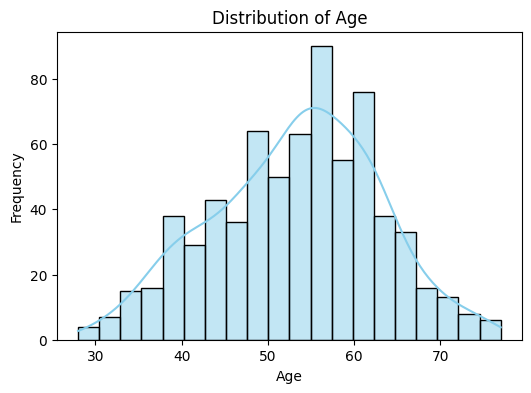

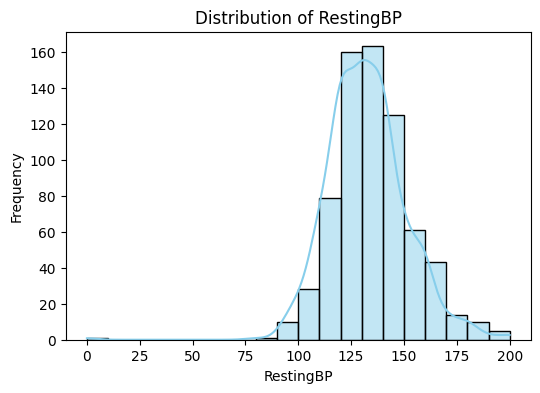

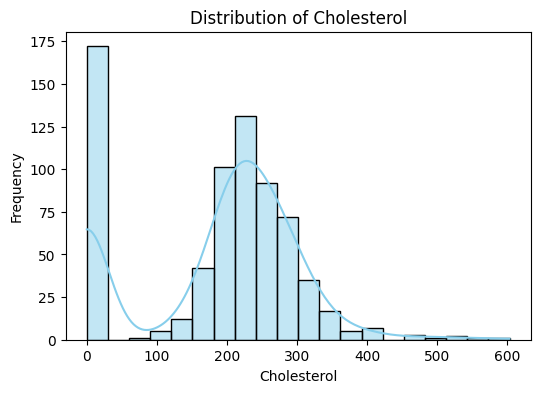

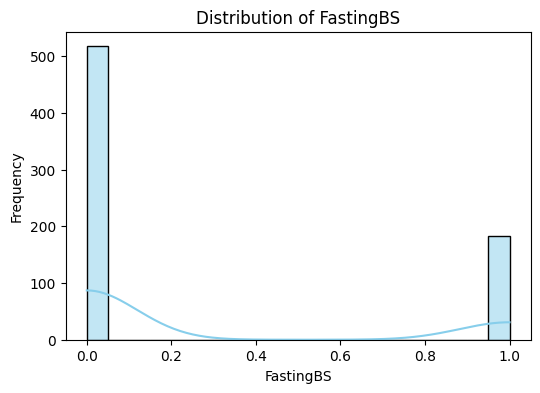

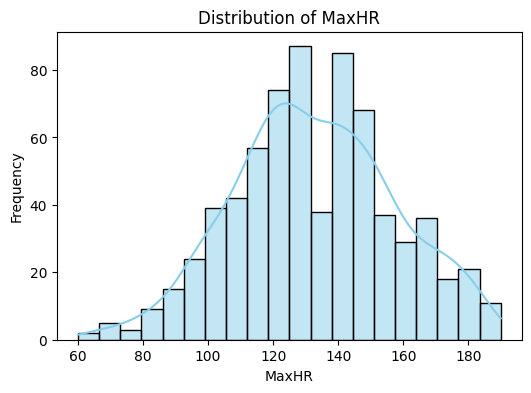

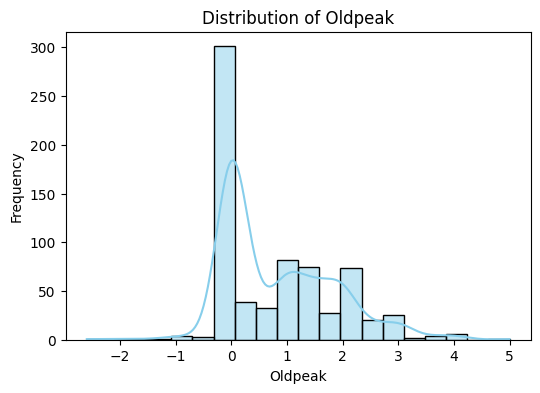

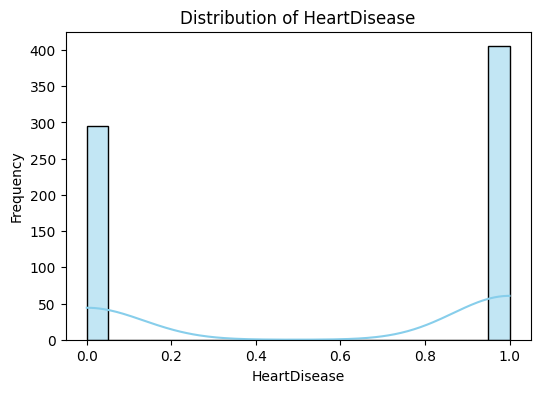

In [8]:
#Distribution of numeric variables using histogram
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

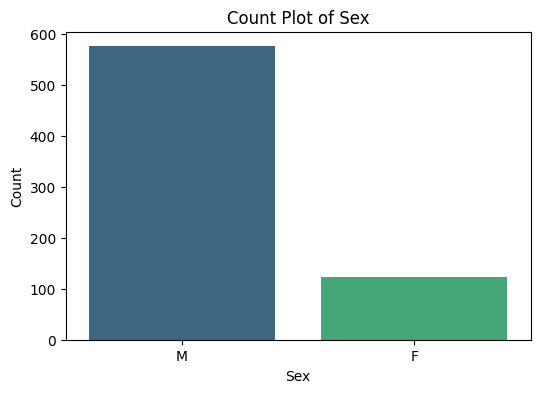

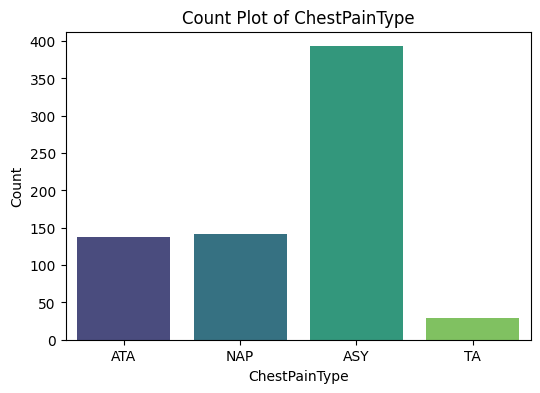

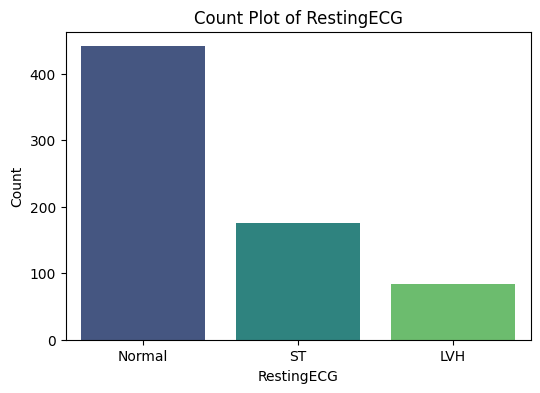

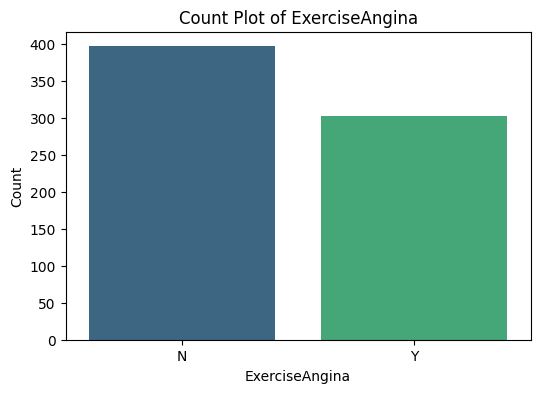

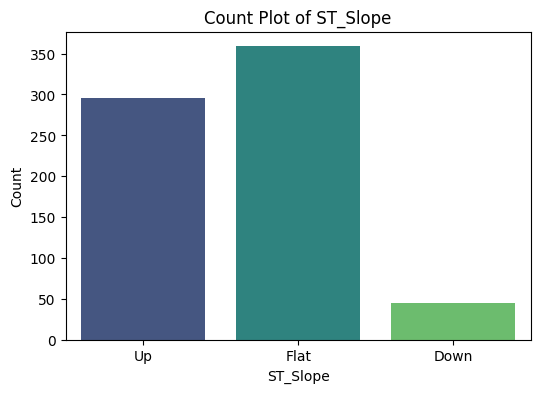

In [11]:
# 4. Distribution of nominal variables using count plot
nominal_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in nominal_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette='viridis')  # Ensure data and x arguments are specified
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


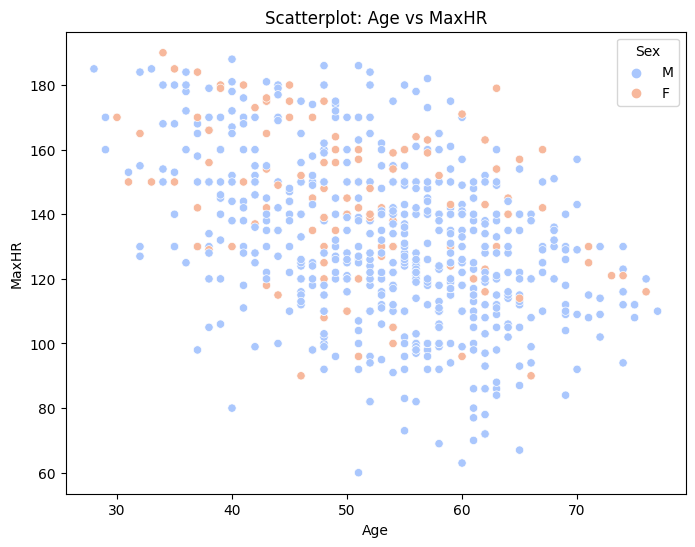

In [12]:
# 5. Comparison of numeric variables using scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MaxHR', data=data, hue='Sex', palette='coolwarm')
plt.title('Scatterplot: Age vs MaxHR')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend(title='Sex')
plt.show()

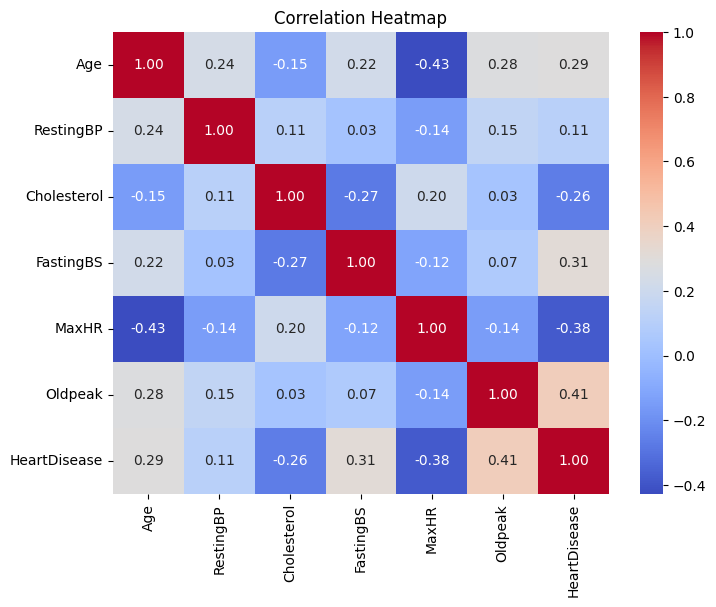

In [13]:
# 6. Heatmap for correlation
plt.figure(figsize=(8, 6))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

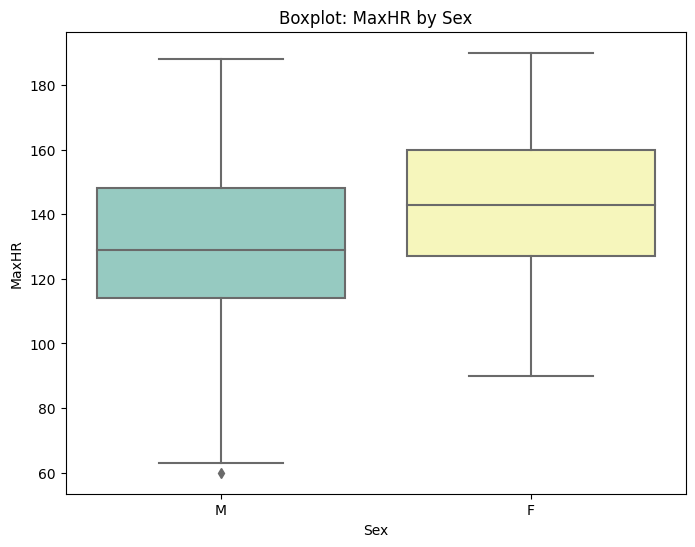

In [14]:
# 7. Boxplot to compare values within groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='MaxHR', data=data, palette='Set3')
plt.title('Boxplot: MaxHR by Sex')
plt.xlabel('Sex')
plt.ylabel('MaxHR')
plt.show()

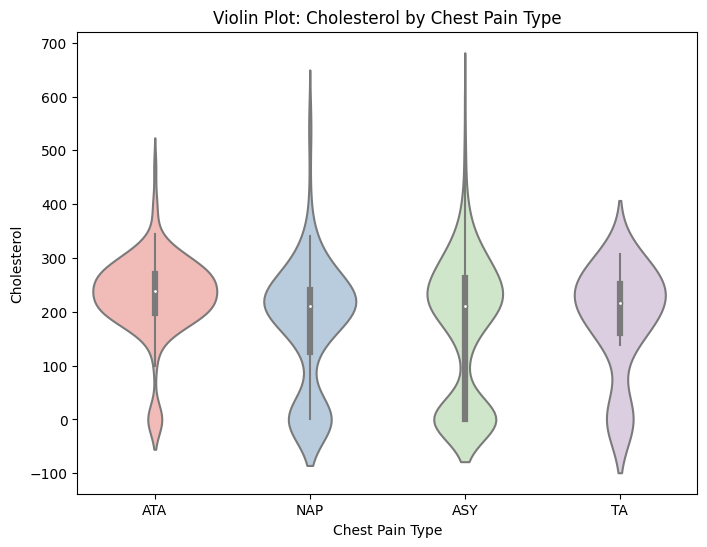

In [15]:
# 8. Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='ChestPainType', y='Cholesterol', data=data, palette='Pastel1')
plt.title('Violin Plot: Cholesterol by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')
plt.show()

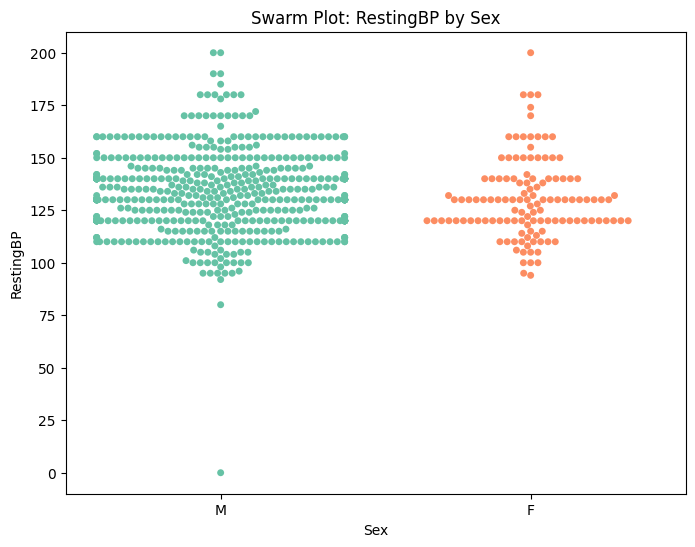

In [16]:
# 9. Swarm Plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Sex', y='RestingBP', data=data, palette='Set2')
plt.title('Swarm Plot: RestingBP by Sex')
plt.xlabel('Sex')
plt.ylabel('RestingBP')
plt.show()

In [17]:
##INTERPRETATIONS

#Numeric Distributions: Age and MaxHR are symmetric, while Cholesterol and Oldpeak are right-skewed, indicating varied risk levels.
#Categorical Counts: Sex is slightly imbalanced, with ASY chest pain and Flat ST_Slope being more common.
#Scatterplot: Age and MaxHR show a negative trend, with gender differences visible.
#Correlations: Age and MaxHR are moderately negatively correlated, with weak relationships among other variables.
#Boxplots & Violin Plots: Males tend to have higher MaxHR, and ASY chest pain correlates with higher Cholesterol.